Observations:
1. The tumor volume measurement for mouse l589 increased during the first part of the study but decreased during the second half.
2. There is a strong positive correlation between average tumor volume and the weight of the mice treated with Capomulin.
3. Of the measurements for final tumor volume realted to mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin, only one datapoint was a possible statistical outlier.

In [34]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import os
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from matplotlib.patches import Polygon

In [35]:
# Study data files
mouse_metadata_path = os.path.join("..","Resources","Mouse_metadata.csv")
study_results_path = os.path.join("..","Resources","Study_results.csv")

In [36]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [37]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
df = df.rename(columns={"Tumor Volume (mm3)":"tumor_volume"})
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Calculate the number of mice.
len(df["Mouse ID"].unique())

249

Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

In [39]:
#Check for duplicates and drop, then create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_series=df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
df.loc[duplicate_mouse_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,tumor_volume,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
#Mouse g989 is a duplicate, remove it
clean_df=df.loc[df["Mouse ID"]!="g989"]

In [41]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [42]:
regimen_volume_clean_groupby=clean_df[["Drug Regimen", "tumor_volume"]].groupby("Drug Regimen")
tumor_volume_mean=regimen_volume_clean_groupby["tumor_volume"].mean()
tumor_volume_median=regimen_volume_clean_groupby["tumor_volume"].median()
tumor_volume_variance=regimen_volume_clean_groupby["tumor_volume"].var()
tumor_volume_standard_deviation=regimen_volume_clean_groupby["tumor_volume"].std()
tumor_volume_SEM=regimen_volume_clean_groupby["tumor_volume"].sem()
drug_regimen_df=pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,"Median Tumor Volume":tumor_volume_median,"Tumor Volume Variance":tumor_volume_variance,"Tumor Volume Standard Deviation":tumor_volume_standard_deviation,"Tumor Volume SEM":tumor_volume_SEM})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Using the aggregation method, produce the same summary statistics in a single line of code.

In [43]:
drug_regimen_agg_df=regimen_volume_clean_groupby.agg({"tumor_volume":["mean","median", "var", "std", "sem"]})
drug_regimen_agg_df

tumor_volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

Text(0.5, 0, 'Regimens')

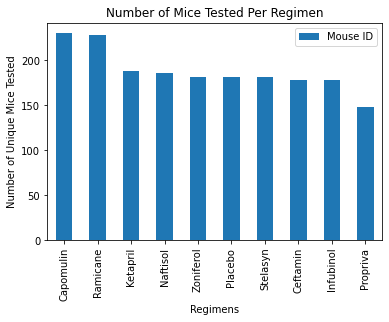

In [44]:
# Create a df with the appropriate columns and groupby the regimen
mice_per_regimen=clean_df[["Mouse ID", "Drug Regimen"]].groupby("Drug Regimen").count()
# Plot
my_plot = mice_per_regimen.sort_values(by=["Mouse ID"],ascending=False).plot(kind="bar")
# Set textual properties
plt.title("Number of Mice Tested Per Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Regimens")

Generate the same bar plot showing the total number of measurements taken on each drug regimen using pyplot.

Text(0, 0.5, 'Total Number of Unique Mice Tested')

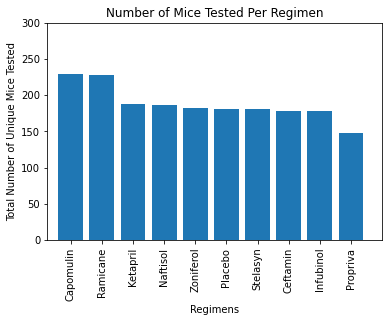

In [45]:
mice_per_regimen=clean_df[["Mouse ID", "Drug Regimen"]].groupby("Drug Regimen").count()
mice_per_regimen_sorted=mice_per_regimen.sort_values("Mouse ID",ascending=False)
plt.bar(mice_per_regimen_sorted.index,"Mouse ID",data=mice_per_regimen_sorted)
x_axis=np.arange(len(mice_per_regimen))
#set x axis headers
tick_locations=[value for value in x_axis]
#use the sorted values of the dataframe as the x axis labels
plt.xticks(tick_locations, mice_per_regimen_sorted.index, rotation=90)
#set x limits
plt.xlim(-0.75, len(x_axis))
#set y limits
plt.ylim(-0.75,300)
#label the chart
plt.title("Number of Mice Tested Per Regimen")
plt.xlabel("Regimens")
plt.ylabel("Total Number of Unique Mice Tested")

Generate a pie plot showing the distribution of female versus male mice using pandas.

<AxesSubplot:ylabel='Sex'>

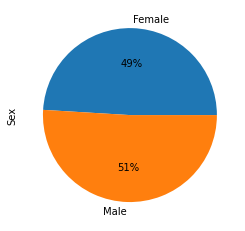

In [46]:
id_sex_df=clean_df[["Mouse ID", "Sex"]].groupby("Sex").count()
id_sex_df.plot.pie(y="Mouse ID",ylabel="Sex",autopct="%1.0f%%",legend=False)

Generate a pie plot showing the distribution of female versus male mice using pyplots.

([<matplotlib.patches.Wedge at 0x232f2988ee0>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49%'),
  Text(0.39932117891546515, 0.4478198254539018, '51%')])

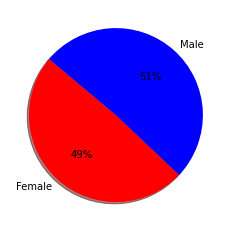

In [47]:
categories=id_sex_df["Mouse ID"]
colors=["red","blue"]
plt.pie(categories, labels=id_sex_df.index, colors=colors,autopct="%1.0f%%",shadow=True,startangle=140)

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

In [48]:
#Determine final timepoint for each mouse across the four requested treatment regimens
#Determine final timepoint for each mouse
max_timepoint=clean_df.groupby("Mouse ID")["Timepoint"].max()
#Merge the dataframes to get the "final tumor volume"
max_timepoint_df=pd.merge(max_timepoint,clean_df,on=["Mouse ID","Timepoint"])
promising_treatments_df=max_timepoint_df.loc[(max_timepoint_df["Drug Regimen"] == "Capomulin")|(max_timepoint_df["Drug Regimen"] == "Ramicane")|(max_timepoint_df["Drug Regimen"] == "Infubinol")|(max_timepoint_df["Drug Regimen"] == "Ceftamin")]
#change label of "tumor_volume" to "final tumor volume"
promising_treatments_df=promising_treatments_df.rename(columns={"tumor_volume":"Final Tumor Volume"})
promising_treatments_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [49]:
# Put treatments into a list for for loop (and later for plot labels)
promising_regimens=promising_treatments_df["Drug Regimen"].unique()
promising_regimens

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [50]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list=[]
# Fill list with final tumor volume values
for drug in promising_regimens:
    final_tumor_vol=promising_treatments_df.loc[promising_treatments_df["Drug Regimen"]==drug, "Final Tumor Volume"]
    tumor_volume_list.append(final_tumor_vol)

In [51]:
#Create dfs for each promising regimen
ramicane_df=promising_treatments_df.loc[promising_treatments_df["Drug Regimen"]=="Ramicane"]
capomulin_df=promising_treatments_df.loc[promising_treatments_df["Drug Regimen"]=="Capomulin"]
infubinol_df=promising_treatments_df.loc[promising_treatments_df["Drug Regimen"]=="Infubinol"]
ceftamin_df=promising_treatments_df.loc[promising_treatments_df["Drug Regimen"]=="Ceftamin"]

Calculate the IQR of each of the promising regimens and determine if there are any potential outliers for each treatment.

In [52]:
# Ramicane
final_ramicane_tumor_volume=ramicane_df["Final Tumor Volume"]
quartiles=final_ramicane_tumor_volume.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
iqr=upperq - lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
print(f"The IQR for Ramicane is: {iqr}")
outliers=ramicane_df.loc[(ramicane_df['Final Tumor Volume'] < lower_bound) | (ramicane_df['Final Tumor Volume'] > upper_bound)]
print(outliers)
print("There are no potential outliers for Ramicane.")

The IQR for Ramicane is: 9.098536719999998
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Final Tumor Volume, Metastatic Sites]
Index: []
There are no potential outliers for Ramicane.


In [53]:
# Capomulin
final_capomulin_tumor_volume=capomulin_df["Final Tumor Volume"]
quartiles=final_capomulin_tumor_volume.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
iqr=upperq - lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
print(f"The IQR is: {iqr}")
outliers=capomulin_df.loc[(capomulin_df['Final Tumor Volume'] < lower_bound) | (capomulin_df['Final Tumor Volume'] > upper_bound)]
print(outliers)
print("There are no potential outliers for Capomulin.")

The IQR is: 7.781863460000004
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Final Tumor Volume, Metastatic Sites]
Index: []
There are no potential outliers for Capomulin.


In [54]:
# Infubinol
final_infubinol_tumor_volume=infubinol_df["Final Tumor Volume"]
quartiles=final_infubinol_tumor_volume.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
iqr=upperq - lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
print(f"The IQR is: {iqr}")
outliers=infubinol_df.loc[(infubinol_df['Final Tumor Volume'] < lower_bound) | (infubinol_df['Final Tumor Volume'] > upper_bound)]
print("Potential outlier value for Infubinol is Final Tumor Volume 31 (36.32 (mm3))")
outliers


The IQR is: 11.477135160000003
Potential outlier value for Infubinol is Final Tumor Volume 31 (36.32 (mm3))


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume,Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


In [55]:
# Ceftamin
final_ceftamin_tumor_volume=ceftamin_df["Final Tumor Volume"]
quartiles=final_ceftamin_tumor_volume.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
iqr=upperq - lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
print(f"The IQR is: {iqr}")
outliers=ceftamin_df.loc[(ceftamin_df['Final Tumor Volume'] < lower_bound) | (ceftamin_df['Final Tumor Volume'] > upper_bound)]
print(outliers)
print("There are no potential outliers for Ceftamin.")

The IQR is: 15.577752179999997
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Final Tumor Volume, Metastatic Sites]
Index: []
There are no potential outliers for Ceftamin.


Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

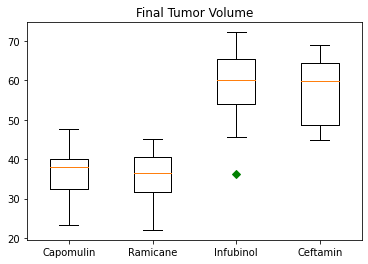

In [56]:
fig, ax=plt.subplots()
ax.set_title("Final Tumor Volume")
ax.boxplot([final_capomulin_tumor_volume,final_ramicane_tumor_volume,final_infubinol_tumor_volume,final_ceftamin_tumor_volume],0,"gD")
ax.set_xticklabels(["Capomulin","Ramicane","Infubinol", "Ceftamin"])

Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Text(0, 0.5, 'Tumor Volume (mm3)')

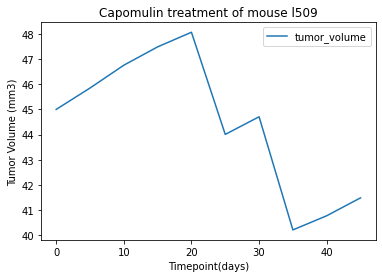

In [57]:
l509_df=df.loc[df["Mouse ID"]=="l509"]
l509_df_cleaned=l509_df[["Mouse ID", "tumor_volume","Timepoint"]]
l509_df_cleaned.plot("Timepoint")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

Text(0, 0.5, 'Average Tumor Volume')

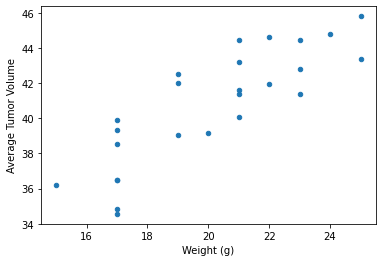

In [58]:
clean_df
scatter_df=clean_df[["Mouse ID","Drug Regimen","Weight (g)","tumor_volume"]]
capo_df=scatter_df.loc[scatter_df["Drug Regimen"]=="Capomulin"]
weight_volume_df=capo_df.groupby("Mouse ID").mean()
weight_volume_df.plot.scatter("Weight (g)","tumor_volume")
plt.ylabel("Average Tumor Volume")

Calculate the correlation coefficient and linear regression model.

The correlation coefficent is (0.8419363424694717, 1.322572243471279e-07)


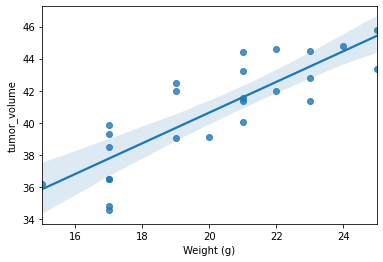

In [59]:
import seaborn as sns
x=weight_volume_df.iloc[:,0]
y=weight_volume_df.iloc[:,1]
ax=sns.regplot(x=weight_volume_df.iloc[:,0],y=weight_volume_df.iloc[:,1],data=weight_volume_df)
correlation=sts.pearsonr(x,y)
print(f"The correlation coefficent is {correlation}")